# Importing the Data

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
netflix_df = pd.read_csv('netflix_.csv')

In [2]:
# Display the first few rows and basic information
print(netflix_df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
print(netflix_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## Data Pre-Processing

##Handling Missing Values

In [5]:
import pandas as pd
import numpy as np

# Handle missing values in categorical columns
categorical_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description']
for col in categorical_cols:
    netflix_df[col] = netflix_df[col].fillna('Unknown')

# Handle missing values in date_added column
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df = netflix_df.dropna(subset=['date_added'])

# Handle missing values in release_year (numeric column)
netflix_df['release_year'] = netflix_df['release_year'].fillna(netflix_df['release_year'].median())

# Handle duration column (mixed numeric and categorical)
netflix_df[['duration_value', 'duration_unit']] = netflix_df['duration'].str.split(' ', n=1, expand=True)
netflix_df['duration_value'] = pd.to_numeric(netflix_df['duration_value'], errors='coerce')
netflix_df['duration_value'] = netflix_df['duration_value'].fillna(netflix_df['duration_value'].median())
netflix_df['duration_unit'] = netflix_df['duration_unit'].fillna(netflix_df['duration_unit'].mode()[0])

# Reconstruct the duration column
netflix_df['duration'] = netflix_df['duration_value'].astype(str) + ' ' + netflix_df['duration_unit']

# Drop temporary columns
netflix_df = netflix_df.drop(columns=['duration_value', 'duration_unit'])

# Verify the changes
print(netflix_df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## Removing Duplicates

In [6]:
# Check for duplicates
print(netflix_df.duplicated().sum())

# Remove duplicates if any
netflix_df = netflix_df.drop_duplicates()

0


## Step - 2.3: Correiting the inconsistencies and erros in data

In [7]:
# Convert text to lowercase
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']
for col in text_columns:
    netflix_df[col] = netflix_df[col].str.lower()

# Trim whitespace
netflix_df = netflix_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
# Convert 'release_year' to integer
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce').astype('Int64')

# Convert 'date_added' to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

In [9]:
# Split duration into value and unit
netflix_df[['duration_value', 'duration_unit']] = netflix_df['duration'].str.split(' ', expand=True)
netflix_df['duration_value'] = pd.to_numeric(netflix_df['duration_value'], errors='coerce')

# Convert movie durations to minutes if in hours
mask = netflix_df['duration_unit'] == 'h'
netflix_df.loc[mask, 'duration_value'] *= 60
netflix_df.loc[mask, 'duration_unit'] = 'min'

In [10]:
# Split 'listed_in' into separate genres
netflix_df['genres'] = netflix_df['listed_in'].str.split(',')

# If you want to clean up the genre names (remove leading/trailing whitespace)
netflix_df['genres'] = netflix_df['genres'].apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else x)

# Print the first few rows to verify the changes
print(netflix_df[['title', 'listed_in', 'genres']].head())

                   title                                          listed_in  \
0   dick johnson is dead                                      documentaries   
1          blood & water    international tv shows, tv dramas, tv mysteries   
2              ganglands  crime tv shows, international tv shows, tv act...   
3  jailbirds new orleans                             docuseries, reality tv   
4           kota factory  international tv shows, romantic tv shows, tv ...   

                                              genres  
0                                    [documentaries]  
1  [international tv shows, tv dramas, tv mysteries]  
2  [crime tv shows, international tv shows, tv ac...  
3                           [docuseries, reality tv]  
4  [international tv shows, romantic tv shows, tv...  


In [11]:
print(netflix_df.dtypes)

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               Int64
rating                    object
duration                  object
listed_in                 object
description               object
duration_value           float64
duration_unit             object
genres                    object
dtype: object


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netflix_df = pd.read_csv('netflix_.csv')

# 1. Standardize text data
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']
for col in text_columns:
    netflix_df[col] = netflix_df[col].astype(str).str.strip().str.lower()

# 2. Handle the 'type' column
netflix_df['type'] = netflix_df['type'].str.lower()
valid_types = ['movie', 'tv show']
netflix_df.loc[~netflix_df['type'].isin(valid_types), 'type'] = 'unknown'

# 3. Clean up the 'rating' column
netflix_df['rating'] = netflix_df['rating'].str.upper()

# 4. Handle the 'duration' column
netflix_df['duration'] = netflix_df['duration'].astype(str).str.lower()
netflix_df[['duration_value', 'duration_unit']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')
netflix_df['duration_value'] = pd.to_numeric(netflix_df['duration_value'], errors='coerce')

# Standardize duration units
netflix_df.loc[netflix_df['duration_unit'].str.contains('season', na=False), 'duration_unit'] = 'seasons'
netflix_df.loc[netflix_df['duration_unit'].str.contains('min', na=False), 'duration_unit'] = 'min'

# 5. Clean up 'release_year'
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')
current_year = pd.Timestamp.now().year
netflix_df.loc[netflix_df['release_year'] > current_year, 'release_year'] = np.nan

# 6. Handle 'date_added'
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# 7. Clean up 'listed_in' (genres)
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(',')
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: tuple(sorted(genre.strip() for genre in x)) if isinstance(x, list) else x)

# 8. Remove any completely duplicate rows
netflix_df = netflix_df.drop_duplicates()

# 9. Check for and handle any remaining missing values
for column in netflix_df.columns:
    if netflix_df[column].dtype == 'object':
        netflix_df[column] = netflix_df[column].fillna('Unknown')
    elif netflix_df[column].dtype in ['int64', 'float64']:
        netflix_df[column] = netflix_df[column].fillna(netflix_df[column].median())

# Print summary of the cleaned dataset
print(netflix_df.info())
print("\nSample of cleaned data:")
print(netflix_df.head())

# Check for any remaining issues
print("\nUnique values in 'type' column:", netflix_df['type'].unique())
print("\nUnique values in 'rating' column:", netflix_df['rating'].unique())
print("\nRange of 'release_year':", netflix_df['release_year'].min(), "to", netflix_df['release_year'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8709 non-null   datetime64[ns]
 7   release_year    8807 non-null   float64       
 8   rating          8807 non-null   object        
 9   duration        8807 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  duration_value  8807 non-null   float64       
 13  duration_unit   8807 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usag

## Exploratory Data Analysis (EDA)

## * Univariate Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
plt.style.use('seaborn-v0_8')

In [14]:
numeric_columns = ['release_year', 'duration_value']

#here we can print the basic statsics of the netflix data

for col in numeric_columns:
    print(f"\nSummary Statistics for {col}:")
    print(f"Mean: {netflix_df[col].mean():.2f}")
    print(f"Median: {netflix_df[col].median():.2f}")
    print(f"Mode: {netflix_df[col].mode()[0]:.2f}")
    print(f"Standard Deviation: {netflix_df[col].std():.2f}")
    print(f"Minimum: {netflix_df[col].min():.2f}")
    print(f"Maximum: {netflix_df[col].max():.2f}")
    print(f"25th Percentile: {netflix_df[col].quantile(0.25):.2f}")
    print(f"75th Percentile: {netflix_df[col].quantile(0.75):.2f}")
    print(f"Skewness: {netflix_df[col].skew():.2f}")
    print(f"Kurtosis: {netflix_df[col].kurtosis():.2f}")

categorical_columns = ['type', 'rating', 'country']

for col in categorical_columns:
    print(f"\nTop 5 categories in {col}:")
    print(netflix_df[col].value_counts().nlargest(5))


Summary Statistics for release_year:
Mean: 2014.18
Median: 2017.00
Mode: 2018.00
Standard Deviation: 8.82
Minimum: 1925.00
Maximum: 2021.00
25th Percentile: 2013.00
75th Percentile: 2019.00
Skewness: -3.45
Kurtosis: 16.23

Summary Statistics for duration_value:
Mean: 69.85
Median: 88.00
Mode: 1.00
Standard Deviation: 50.81
Minimum: 1.00
Maximum: 312.00
25th Percentile: 2.00
75th Percentile: 106.00
Skewness: -0.19
Kurtosis: -1.08

Top 5 categories in type:
type
movie      6131
tv show    2676
Name: count, dtype: int64

Top 5 categories in rating:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

Top 5 categories in country:
country
united states     2818
india              972
nan                831
united kingdom     419
japan              245
Name: count, dtype: int64


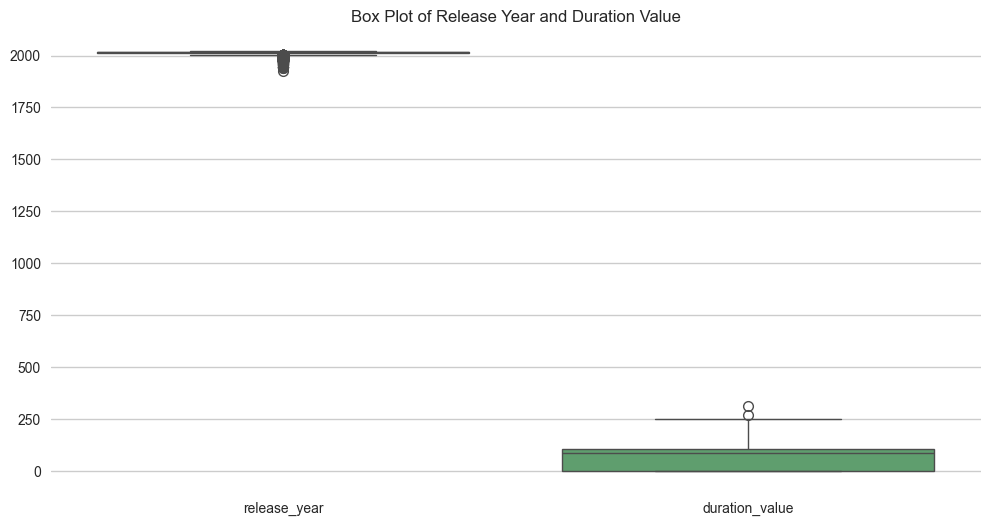

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
sns.set_style("whitegrid")

# Function to create and display plots
def create_plot(plot_func, title):
    plt.figure(figsize=(12, 6))
    plot_func()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Combined Box Plot for Release Year and Duration Value
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_df[['release_year', 'duration_value']])
plt.title('Box Plot of Release Year and Duration Value')
plt.show()

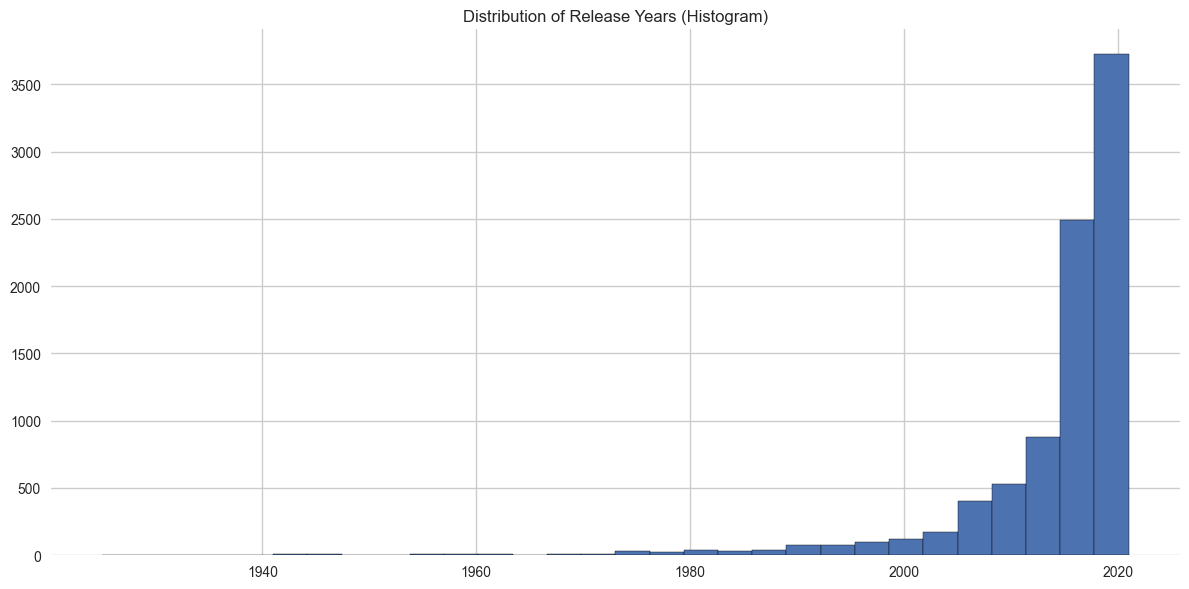

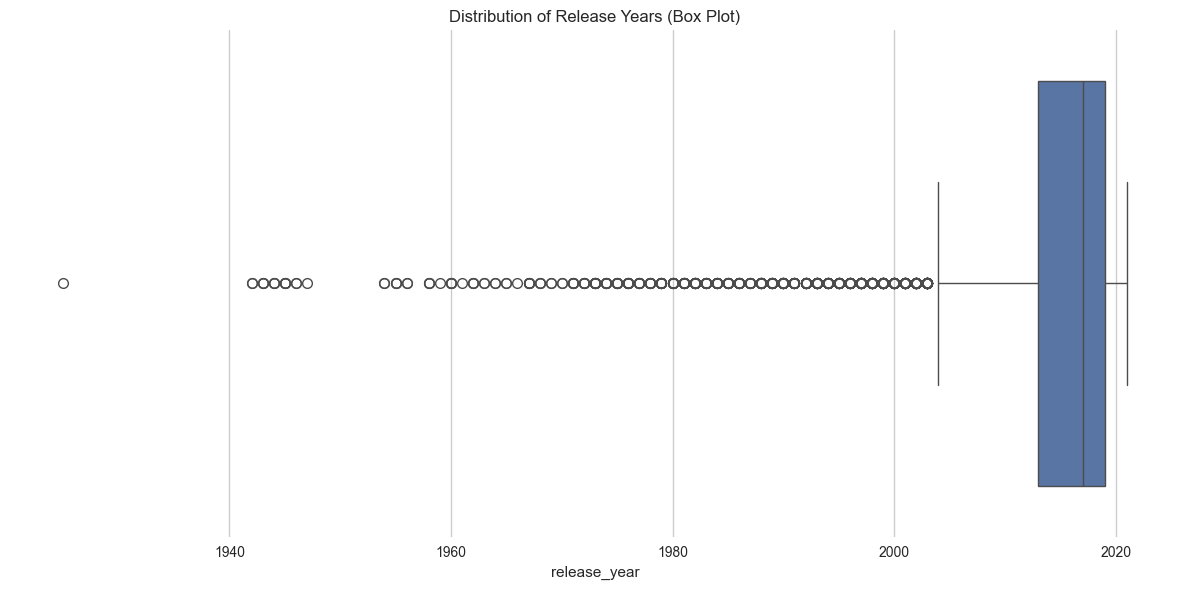

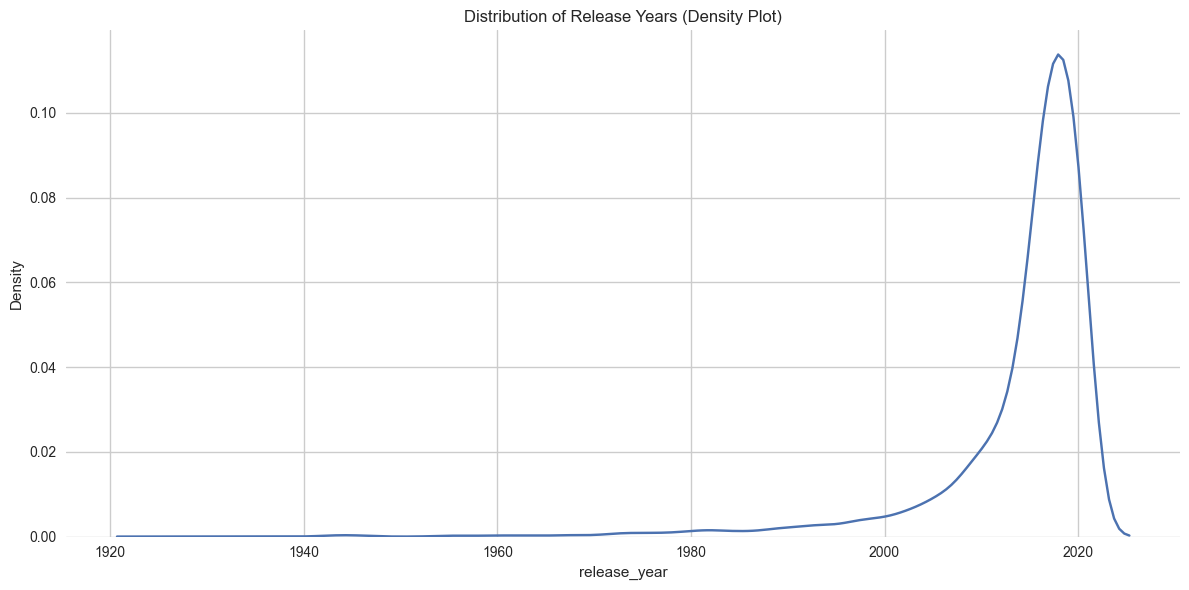

In [16]:
# 2. Distribution of Release Year Visualizations

# Histogram
create_plot(
    lambda: plt.hist(netflix_df['release_year'], bins=30, edgecolor='black'),
    'Distribution of Release Years (Histogram)'
)

# Box Plot
create_plot(
    lambda: sns.boxplot(x=netflix_df['release_year']),
    'Distribution of Release Years (Box Plot)'
)

# Density Plot
create_plot(
    lambda: sns.kdeplot(netflix_df['release_year']),
    'Distribution of Release Years (Density Plot)'
)

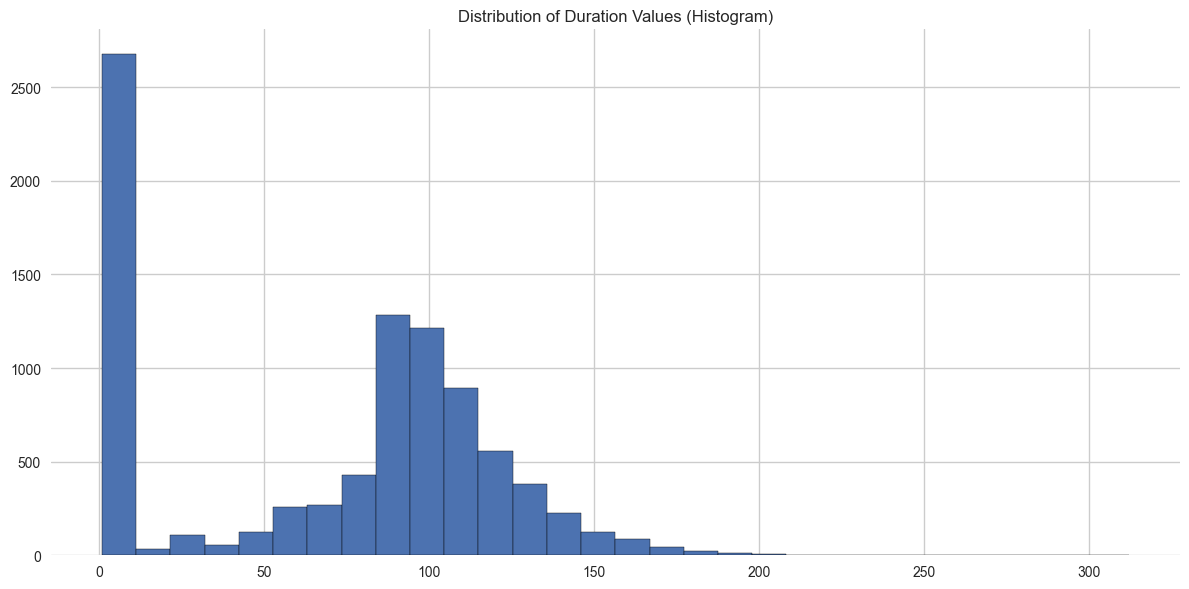

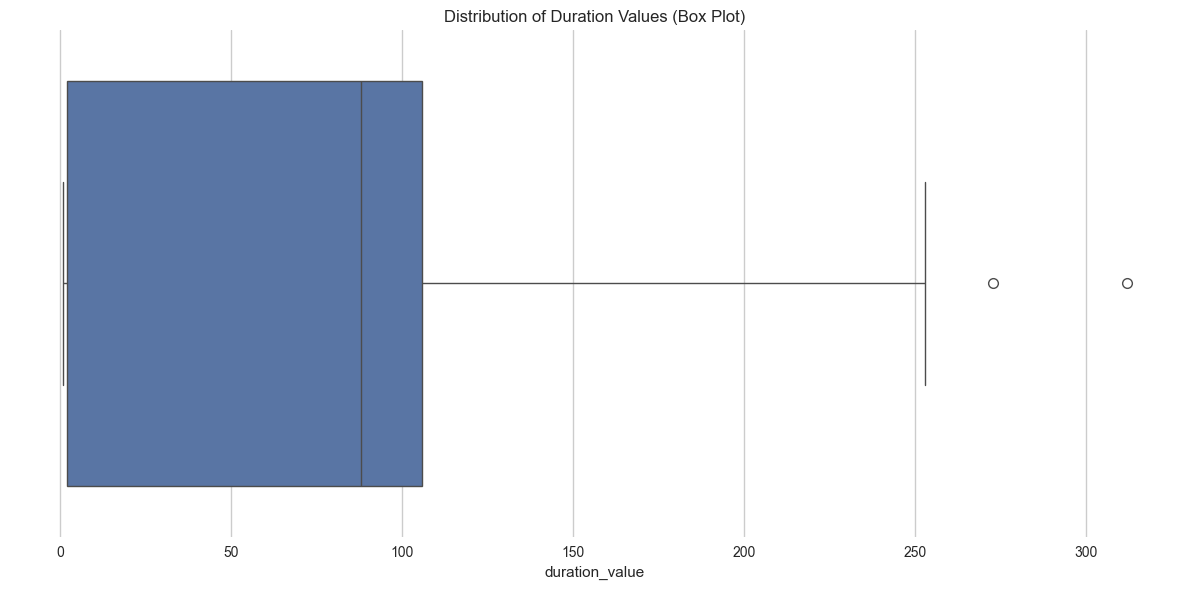

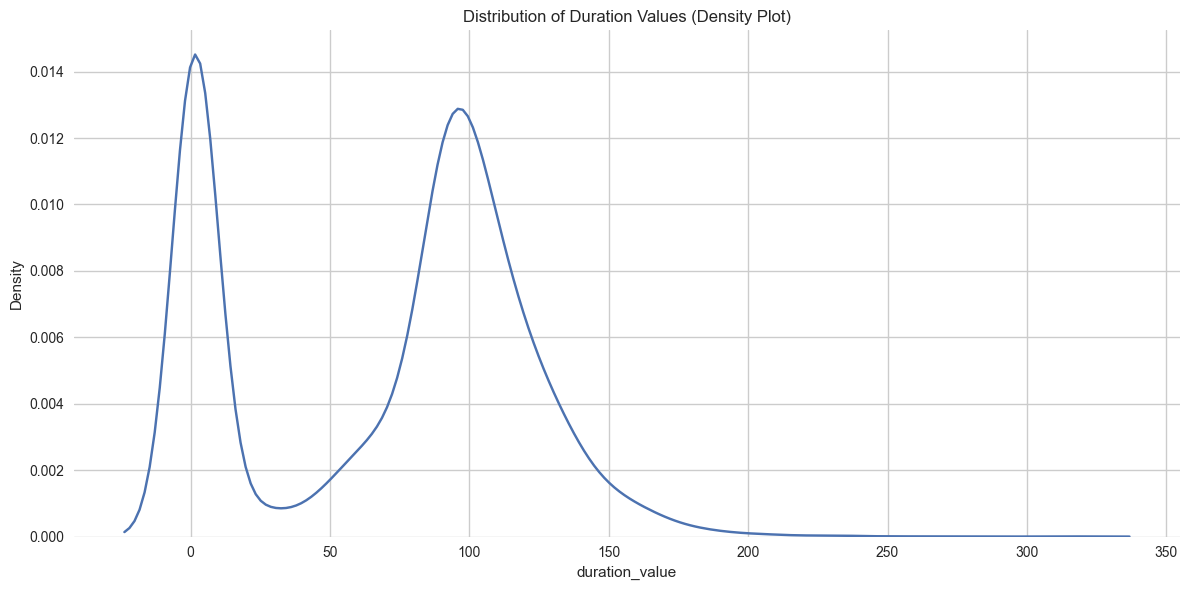

In [17]:
# 3. Distribution of Duration Value Visualizations

# Histogram
create_plot(
    lambda: plt.hist(netflix_df['duration_value'], bins=30, edgecolor='black'),
    'Distribution of Duration Values (Histogram)'
)

# Box Plot
create_plot(
    lambda: sns.boxplot(x=netflix_df['duration_value']),
    'Distribution of Duration Values (Box Plot)'
)

# Density Plot
create_plot(
    lambda: sns.kdeplot(netflix_df['duration_value']),
    'Distribution of Duration Values (Density Plot)'
)

## * Bivariate Analysis

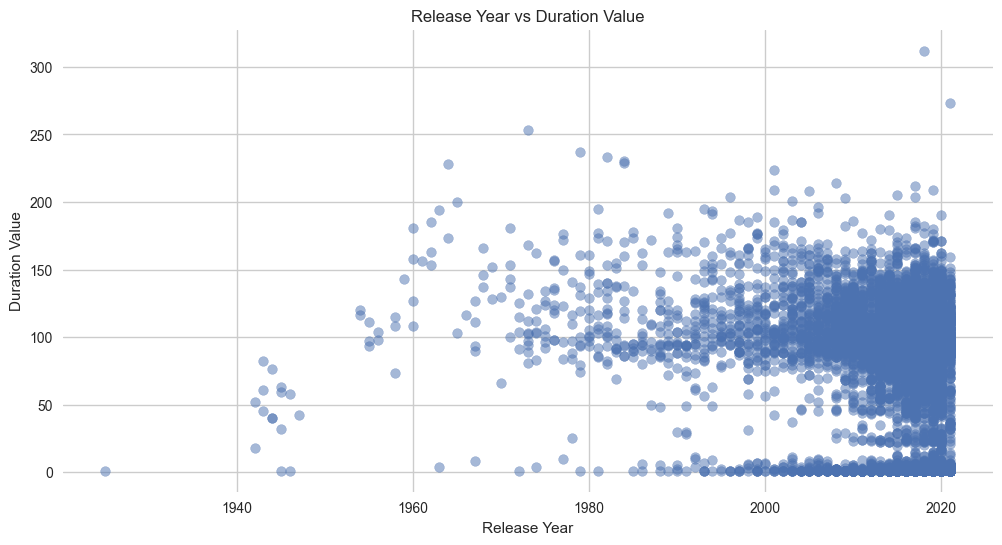

In [18]:
# 1. Scatter plot: Release Year vs Duration Value
plt.figure(figsize=(12, 6))
plt.scatter(netflix_df['release_year'], netflix_df['duration_value'], alpha=0.5)
plt.title('Release Year vs Duration Value')
plt.xlabel('Release Year')
plt.ylabel('Duration Value')
plt.show()

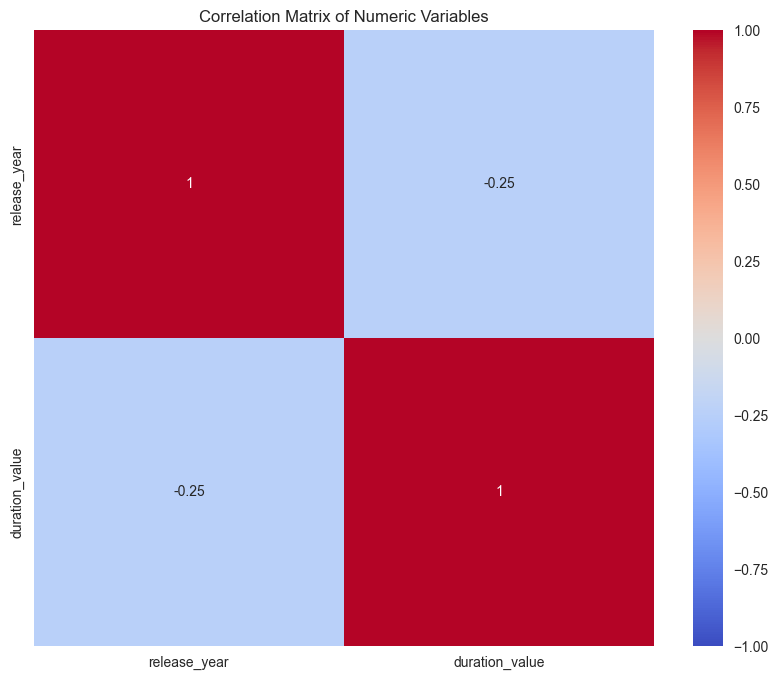

In [19]:
# 2. Correlation matrix for numeric variables
numeric_cols = ['release_year', 'duration_value']
corr_matrix = netflix_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

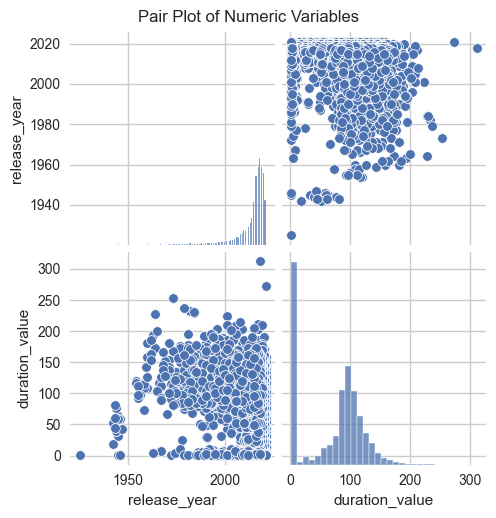

In [20]:
# 3. Pair plot for numeric variables
sns.pairplot(netflix_df[numeric_cols])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

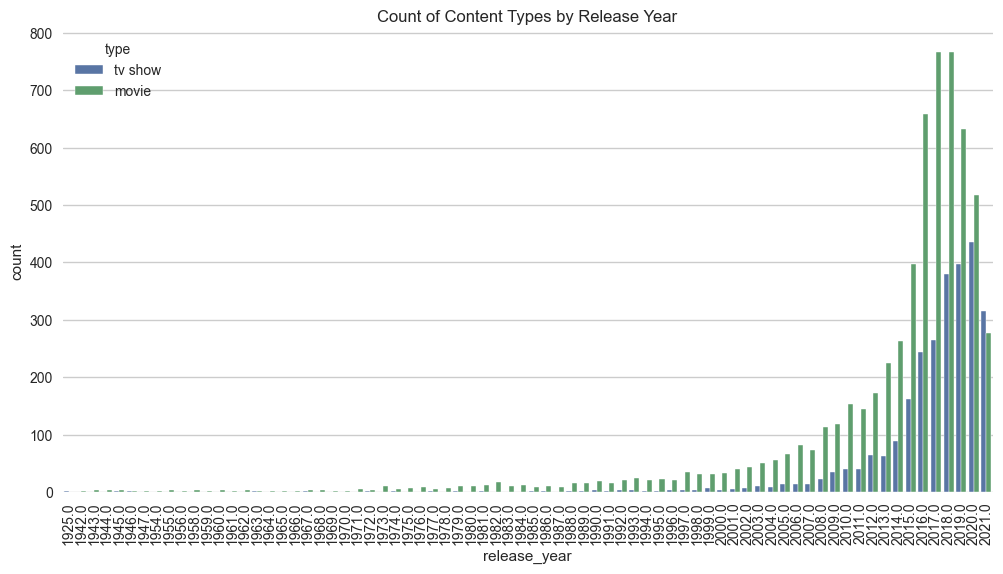

Bivariate analysis plots have been displayed.


In [21]:
# 7. Count plot: Release Year vs Type
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='type', data=netflix_df)
plt.title('Count of Content Types by Release Year')
plt.xticks(rotation=90)
plt.show()

print("Bivariate analysis plots have been displayed.")

## * Multivariate Analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Prepare the data
# Select numeric columns and encode some categorical columns
numeric_cols = ['release_year', 'duration_value']
netflix_numeric = netflix_df[numeric_cols].copy()

# Encode 'type' as binary (0 for TV Show, 1 for Movie)
netflix_numeric['type_encoded'] = (netflix_df['type'] == 'movie').astype(int)

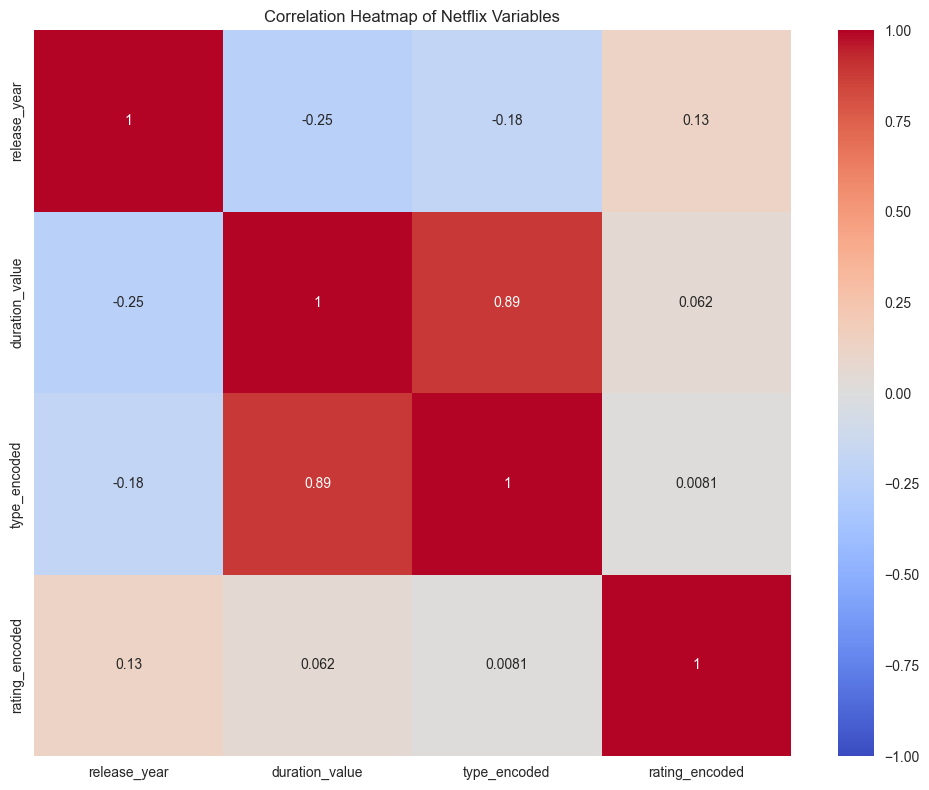

In [23]:
# Encode 'rating' as ordinal
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
netflix_numeric['rating_encoded'] = pd.Categorical(netflix_df['rating'], categories=rating_order, ordered=True).codes

# 2. Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(netflix_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Netflix Variables')
plt.tight_layout()
plt.show()

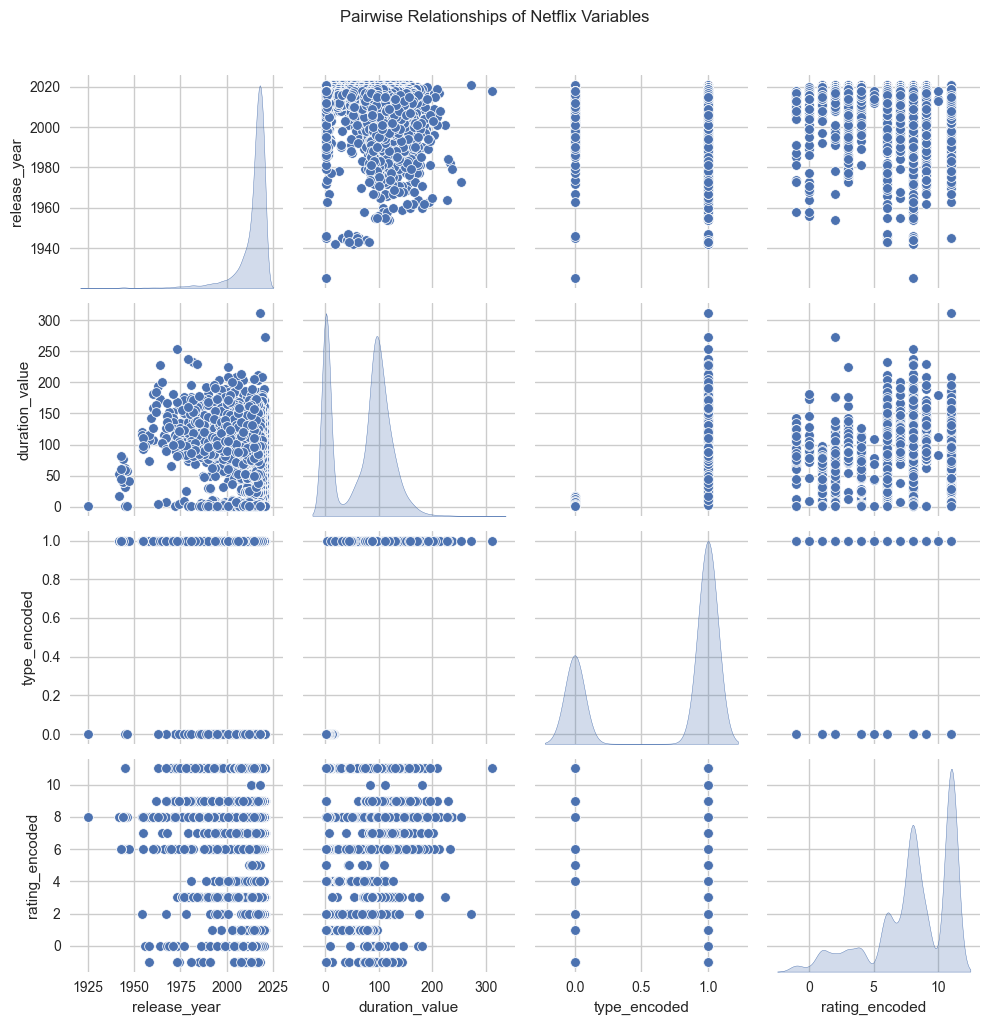

In [24]:
# 3. Visualize pairwise relationships
sns.pairplot(netflix_numeric, diag_kind='kde')
plt.suptitle('Pairwise Relationships of Netflix Variables', y=1.02)
plt.tight_layout()
plt.show()

In [25]:
# 4. Perform Principal Component Analysis (PCA)
# Standardize the features
scaler = StandardScaler()
netflix_scaled = scaler.fit_transform(netflix_numeric)

# Apply PCA
pca = PCA()
netflix_pca = pca.fit_transform(netflix_scaled)

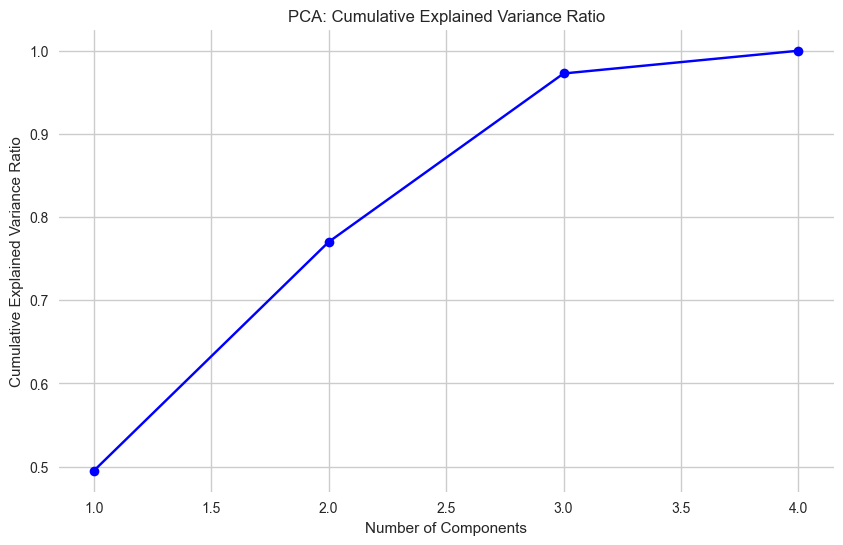

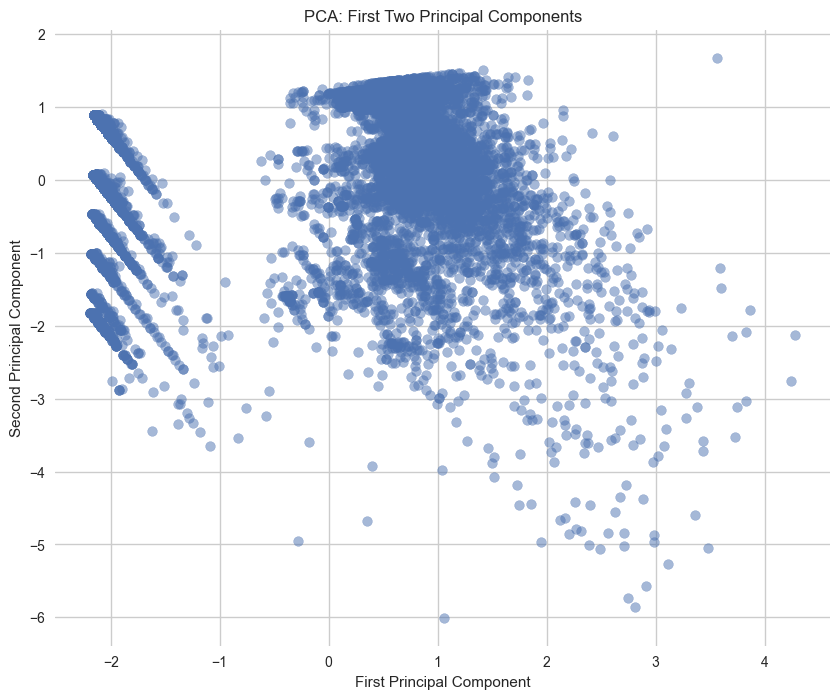

Analysis of interactions between multiple variables is complete.


In [26]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(netflix_pca[:, 0], netflix_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.show()

print("Analysis of interactions between multiple variables is complete.")

## Usage of Functions

Mean duration: 69.82 minutes
Standard deviation of duration: 50.82 minutes

Content type counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


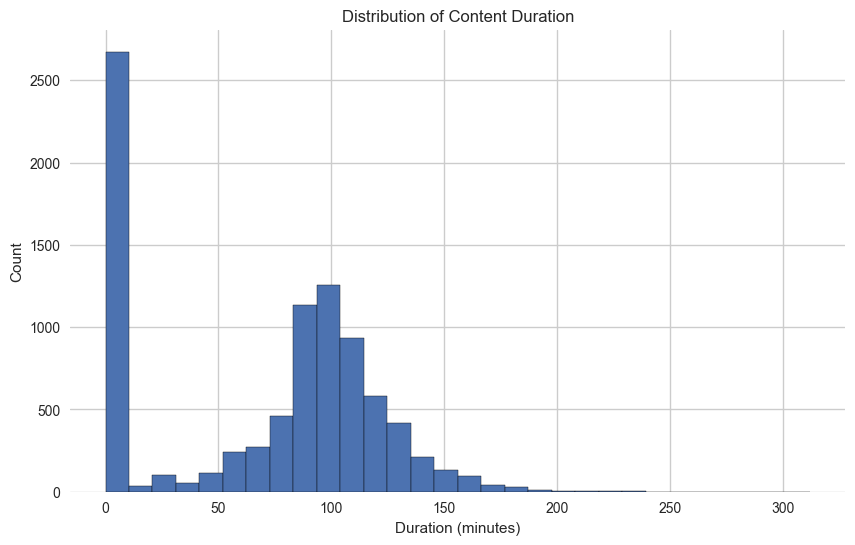

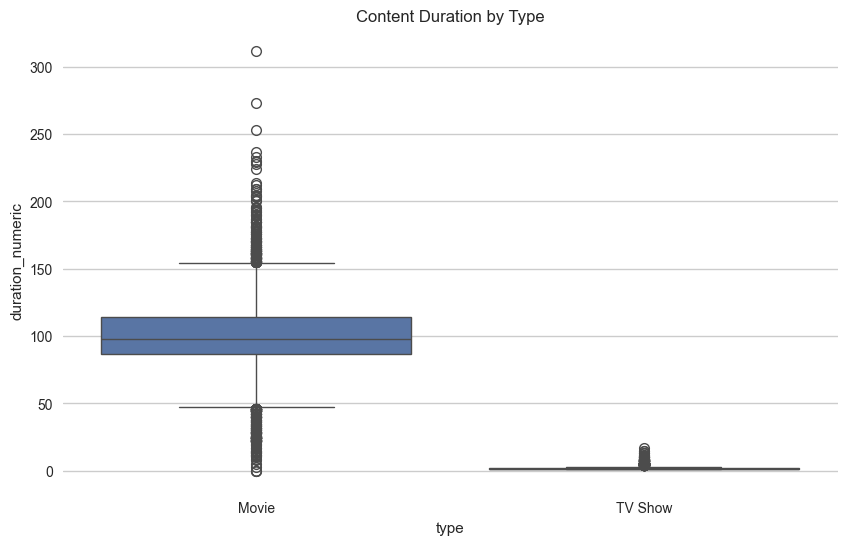

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas are used to Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Use pandas to read the CSV file
    df = pd.read_csv(file_path)
    
    # Use pandas to handle missing values
    df['duration'] = df['duration'].fillna('0 min')
    
    # Use pandas to extract numeric duration
    df['duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)
    
    return df

# NumPy is used to Perform statistical analysis
def analyze_data(df):
    # Use numpy to calculate mean and standard deviation
    mean_duration = np.mean(df['duration_numeric'])
    std_duration = np.std(df['duration_numeric'])
    
    print(f"Mean duration: {mean_duration:.2f} minutes")
    print(f"Standard deviation of duration: {std_duration:.2f} minutes")
    
    # Use pandas for groupby operations
    type_counts = df['type'].value_counts()
    print("\nContent type counts:\n", type_counts)

# Matplotlib is used to Create visualizations
def visualize_data(df):
    # Use matplotlib to create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['duration_numeric'], bins=30, edgecolor='black')
    plt.title('Distribution of Content Duration')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Count')
    plt.show()
    
    # Seaborn is used for Advanced Statistical Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y='duration_numeric', data=df)
    plt.title('Content Duration by Type')
    plt.show()

# Main function to run the analysis
def main():
    df = load_and_preprocess_data('netflix_.csv')
    analyze_data(df)
    visualize_data(df)

if __name__ == "__main__":
    main()